# Stochastic Optimization ENSAE Project

Antoine GRELETY <br>
MS Data Science 2017/2018

This notebook presents the simulation results of two gradient descent algorithms: SDCA and Pegasos. <br>
You will find the detailed code of the algorithms in the Python class "gradient_methods"

## Support Vector Machine with SDCA

In [8]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
boston=datasets.load_boston()

In [10]:
%load_ext autoreload
%autoreload 2
import gradient_methods

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Transformation of the optimization problem $min \ P(w)$ yielding primal solution $w^*$ of dimension D

$$min \ P(w)=[\ \frac{1}{n}\sum{\phi_{i}(w^{T}x_i})+\frac{\lambda}{2}||w||^2 \ ]$$

to a dual maximization problem $max \ D(\alpha)$ yielding dual solution $\alpha^*$ of dimension n

$$max \ D(\alpha)=[\ \frac{1}{n}\sum{-\phi_{i}(-\alpha})-\frac{\lambda}{2}||\ \frac{1}{\lambda n}\sum{\alpha_{i}x_{i}} \ || \ ]$$

For each epoch, the SDCA algorithm aims at maximizing the dual function by moving its coordinates to the best direction from its previous position at $t-1$. We want to find $\Delta \alpha $ that maximizes $D(\alpha^{t-1} + \Delta \alpha)$

We will consider SCDA-Perm procedure that randomizes the dual coordinates and updates each $\Delta \alpha_i$ sequentially

We are interested in maximizing the dual problem with a SVM hinge loss of the form:
$$\phi(a)=max\{0,1-ya\}$$

In this respect, the dual problem has a closed form solution $\Delta \alpha_i$ that maximizes $D_{i}(\alpha^{t-1} + \Delta \alpha_i)$

### Load the data

We will consider a binary classification problem on the white whine quality dataset. <br>
https://archive.ics.uci.edu/ml/datasets/wine+quality

In [4]:
#WHITE WINE DATASET
df=pd.read_csv('/Users/antoinegrelety/Documents/ENSAE/S2_Stochastic_Optim/Projet/data/winequality-white.csv',sep=";")
#transform the problem to binary classification "good/bad": -1 if the grade is below 5/10 and +1 otherwise
df['quality']=df['quality'].apply(lambda x:1 if x>5 else -1)
from sklearn import preprocessing
X=np.array(df.loc[:,df.columns!='quality'])
#scale the input data
X=preprocessing.scale(X)
y=np.array(df.quality)

In [5]:
df.shape

(4898, 12)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [7]:
ind = npr.choice(np.arange(0,len(X)),int(len(X)*2/3),replace=False)
ind_test = np.setdiff1d(np.arange(0,len(X)),ind)
#separate the data in train and test
X_test,y_test=X[ind_test,:],y[ind_test]
X,y=X[ind,:],y[ind]

## SDCA-perm with non smooth hinge loss

In [109]:
lamb=[10**(-2),10**(-3),10**(-4)] #try different values of the regularization parameter
gamma=0  #set the shape of the hinge loss. Gamma=0 equivalent to non-smooth hinge loss
N_epoch=50
SDCA_model = gradient_methods.SDCA(X,y,gamma,N_epoch)
%timeit w,alpha,optim_primal_evol,optim_dual_evol = SDCA_model.SDCA_algo(lamb[0])

1.35 s ± 198 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
w,alpha,optim_primal_evol,optim_dual_evol = SDCA_model.SDCA_algo(lamb[0])

In [42]:
w_1,alpha_1,optim_primal_evol_1,optim_dual_evol_1 = SDCA_model.SDCA_algo(lamb[1])

In [43]:
w_2,alpha_2,optim_primal_evol_2,optim_dual_evol_2 = SDCA_model.SDCA_algo(lamb[2])

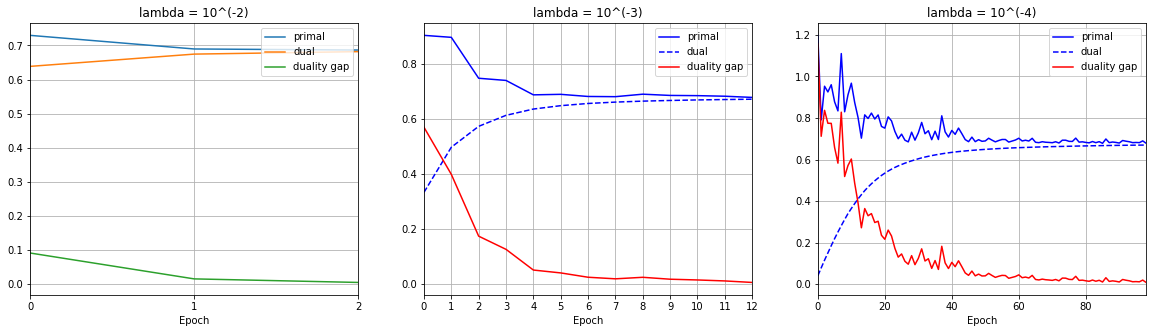

In [64]:
fig = plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(optim_primal_evol)
plt.plot(optim_dual_evol)
plt.plot(np.array(optim_primal_evol)-np.array(optim_dual_evol))
plt.grid()
plt.legend(["primal","dual","duality gap"],loc=1)
plt.title('lambda = 10^(-2)')
plt.xlabel("Epoch")
plt.xlim(0,len(optim_primal_evol)-1)
plt.xticks(np.arange(0,len(optim_primal_evol),1))

plt.subplot(132)
plt.plot(optim_primal_evol_1,color='blue')
plt.plot(optim_dual_evol_1,color='blue',linestyle='--')
plt.plot(np.array(optim_primal_evol_1)-np.array(optim_dual_evol_1),color='red')
plt.grid()
plt.legend(["primal","dual","duality gap"],loc=1)
plt.title('lambda = 10^(-3)')
plt.xlabel("Epoch")
plt.xlim(0,len(optim_primal_evol_1)-1)
plt.xticks(np.arange(0,len(optim_primal_evol_1),1))

plt.subplot(133)
plt.plot(optim_primal_evol_2,color='blue')
plt.plot(optim_dual_evol_2,color='blue',linestyle='--')
plt.plot(np.array(optim_primal_evol_2)-np.array(optim_dual_evol_2),color='red')
plt.grid()
plt.legend(["primal","dual","duality gap"],loc=1)
plt.title('lambda = 10^(-4)')
plt.xlabel("Epoch")
plt.xlim(0,len(optim_primal_evol_2)-1)

plt.savefig("plots/sdca_dual_primal_convergence")
plt.show()

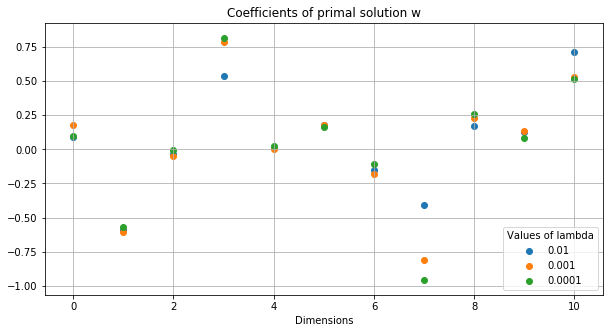

In [45]:
fig = plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(w)),w)
plt.scatter(np.arange(len(w_1)),w_1)
plt.scatter(np.arange(len(w_2)),w_2)
plt.legend(lamb,title='Values of lambda',loc=4)
plt.title("Coefficients of primal solution w")
plt.xlabel('Dimensions')
plt.grid()
plt.savefig("plots/sdca_primal_coef")
plt.show()

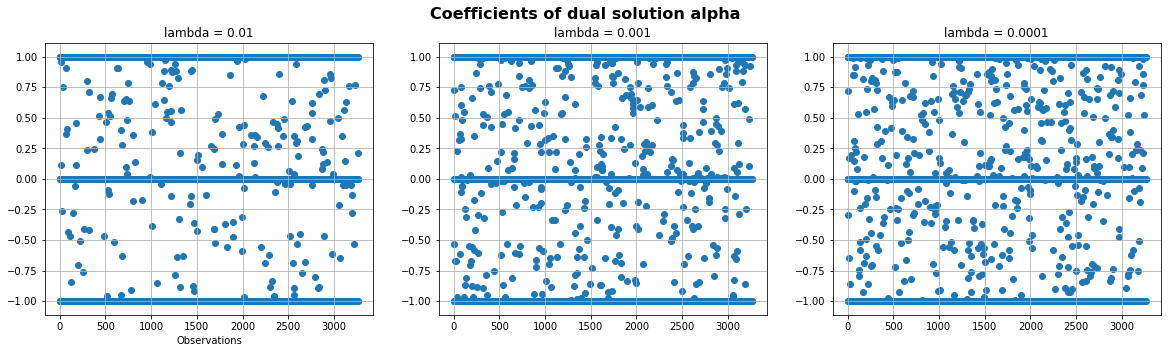

In [46]:
fig = plt.figure(figsize=(20,5))
plt.suptitle("Coefficients of dual solution alpha",fontweight='bold',size=16)

plt.subplot(131)
plt.scatter(np.arange(len(alpha)),alpha)
plt.xlabel('Observations')
plt.grid()
plt.title("lambda = "+str(lamb[0]))
plt.subplot(132)
plt.scatter(np.arange(len(alpha_1)),alpha_1)
plt.title("lambda = "+str(lamb[1]))
plt.grid()
plt.subplot(133)
plt.scatter(np.arange(len(alpha_2)),alpha_2)
plt.title("Coefficients of dual solution alpha")
plt.grid()
plt.title("lambda = "+str(lamb[2]))
plt.savefig("plots/sdca_dual_coef")
plt.show()

In [47]:
#Let's look at the accuracy performances
from sklearn.metrics import confusion_matrix
w_pred = [w,w_1,w_2]
t=0
for w in w_pred:
    y_pred=np.sign(np.dot(X_test,w))
    conf = confusion_matrix(y_test,y_pred)
    print("-----------\n value of lambda:",lamb[t])
    print("confusion matrix: \n",conf)
    print('precision: ',np.sum(np.diag(conf))/len(y_test))
    t=t+1

-----------
 value of lambda: 0.01
confusion matrix: 
 [[400 123]
 [364 746]]
precision:  0.7017758726270668
-----------
 value of lambda: 0.001
confusion matrix: 
 [[400 123]
 [362 748]]
precision:  0.7030006123698714
-----------
 value of lambda: 0.0001
confusion matrix: 
 [[411 112]
 [374 736]]
precision:  0.7023882424984691


## Comparison with Pegasos subgradient for SVM

In [107]:
T=15000
lamb=[10**(-2),10**(-3),10**(-4)] #same values as SDCA
Pega = gradient_methods.Pegasos(X,y,T)
%timeit w,w_list,prim_optim_pegasos = Pega.Pegasos_algo(lamb[0])

529 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [101]:
w,w_list,prim_optim_pegasos = Pega.Pegasos_algo(lamb[0])

In [102]:
w_1,w_list_1,prim_optim_pegasos_1 = Pega.Pegasos_algo(lamb[1])

In [103]:
w_2,w_list_2,prim_optim_pegasos_2 = Pega.Pegasos_algo(lamb[2])

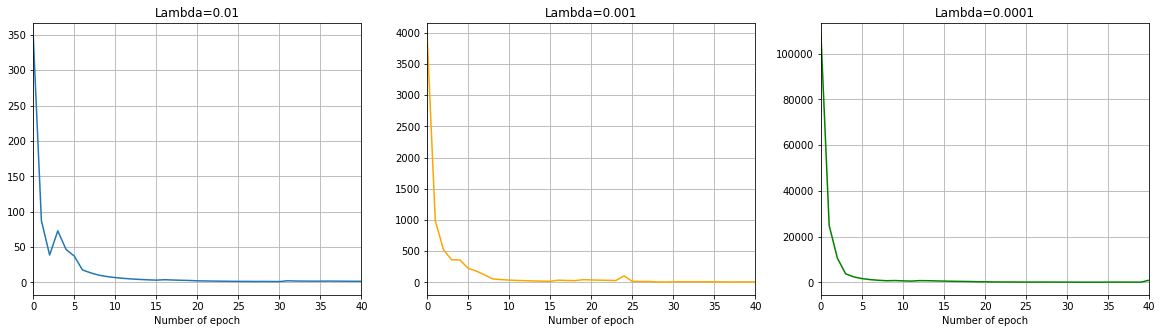

In [104]:
fig = plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(prim_optim_pegasos)
plt.xlabel("Number of epoch")
plt.title('Lambda='+str(lamb[0]))
plt.xlim(0,40)
plt.xticks(np.arange(0,41,5))
plt.grid()

plt.subplot(132)
plt.plot(prim_optim_pegasos_1,color='orange')
plt.xlabel("Number of epoch")
plt.title('Lambda='+str(lamb[1]))
plt.xlim(0,40)
plt.xticks(np.arange(0,41,5))
plt.grid()

plt.subplot(133)
plt.plot(prim_optim_pegasos_2,color='green')
plt.xlabel("Number of epoch")
plt.title('Lambda='+str(lamb[2]))
plt.xlim(0,40)
plt.xticks(np.arange(0,41,5))
plt.grid()

#plt.plot(prim_optim_pegasos_1)

#plt.plot(prim_optim_pegasos_2)
#plt.legend(lamb,title="Values of lambda",loc=1)
#plt.xlim(0,350)
#plt.ylim(0,200)

plt.savefig("plots/pega_convergence")
plt.show()

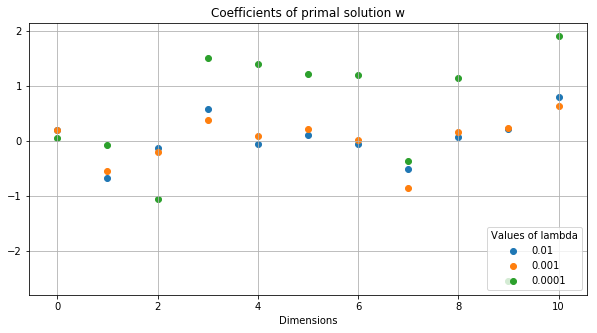

In [105]:
fig = plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(w)),w)
plt.scatter(np.arange(len(w_1)),w_1)
plt.scatter(np.arange(len(w_2)),w_2)
plt.legend(lamb,title='Values of lambda',loc=4)
plt.title("Coefficients of primal solution w")
plt.xlabel('Dimensions')
plt.grid()
plt.savefig("plots/pega_coef")
plt.show()

In [106]:
from sklearn.metrics import confusion_matrix
w_pred = [w,w_1,w_2]
t=0
for w in w_pred:
    y_pred=np.sign(np.dot(X_test,w))
    conf = confusion_matrix(y_test,y_pred)
    print("-----------\n value of lambda:",lamb[t])
    print("confusion matrix: \n",conf)
    print('precision: ',np.sum(np.diag(conf))/len(y_test))
    t=t+1

-----------
 value of lambda: 0.01
confusion matrix: 
 [[405 118]
 [352 758]]
precision:  0.7121861604409063
-----------
 value of lambda: 0.001
confusion matrix: 
 [[407 116]
 [378 732]]
precision:  0.6974892835272505
-----------
 value of lambda: 0.0001
confusion matrix: 
 [[280 243]
 [515 595]]
precision:  0.5358236374770361
